In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from   scipy.ndimage import gaussian_filter1d
from   scipy.signal  import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from GiessenDataAnalysis import analyseGiessen


ModuleNotFoundError: No module named 'GiessenDataAnalysis'

In [2]:
# Load the data from the CSV file
which_obs = 3
data = pd.read_csv('waveform_resampled_all_pressure_traces_rv_with_pca.csv')
time_series = data.iloc[which_obs, 0:101]

In [3]:
reps = 6

In [4]:
time_df= pd.DataFrame({'Pressure' : np.tile(time_series.values, reps), 'cPressure' : np.tile(time_series.values, reps)}, 
                      index=[i for i in range(reps*len(time_series))])

In [5]:
ag = analyseGiessen(df=time_df)

In [6]:
ag.sigma_filter_pressure = 0.0001 # 6 
ag.sigma_filter_dpdt     = 0.0001 # 4
ag.sigma_filter_d2pdt2   = 0.0001 # 2
ag.compute_derivatives()
ag.compute_points_of_interest(height=0, height_d2pdt2=0)

In [7]:
ag._points_df

,a_epad_ind,epad_ind,dia_ind,sys_ind,esp_ind,edp_ind,eivc_ind,t_max_dpdt,t_min_dpdt,t_max_p,...,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR,edp,eivc
0,193,161,101,166,187,157,163,0.24,0.368,0.26,...,25.039523,26.834375,0.474103,0.215679,0.00968,0.901511,0.404,148.514851,2.700821,23.428074
1,294,262,202,267,288,258,264,0.24,0.368,0.26,...,25.039523,26.834375,0.474103,0.215679,0.00968,0.901511,0.404,148.514851,2.700821,23.428074
2,395,363,303,368,389,359,365,0.24,0.368,0.26,...,25.039523,26.834375,0.474103,0.215679,0.00968,0.901511,0.404,148.514851,2.700821,23.428074
3,496,464,404,469,490,460,466,0.24,0.368,0.26,...,25.039523,26.834375,0.474103,0.215679,0.00968,0.901511,0.404,148.514851,2.700821,23.428074
4,597,565,505,570,591,561,567,0.24,0.368,0.26,...,25.039523,26.834375,0.474103,0.215679,0.00968,0.901511,0.400,150.000000,2.700821,23.428074


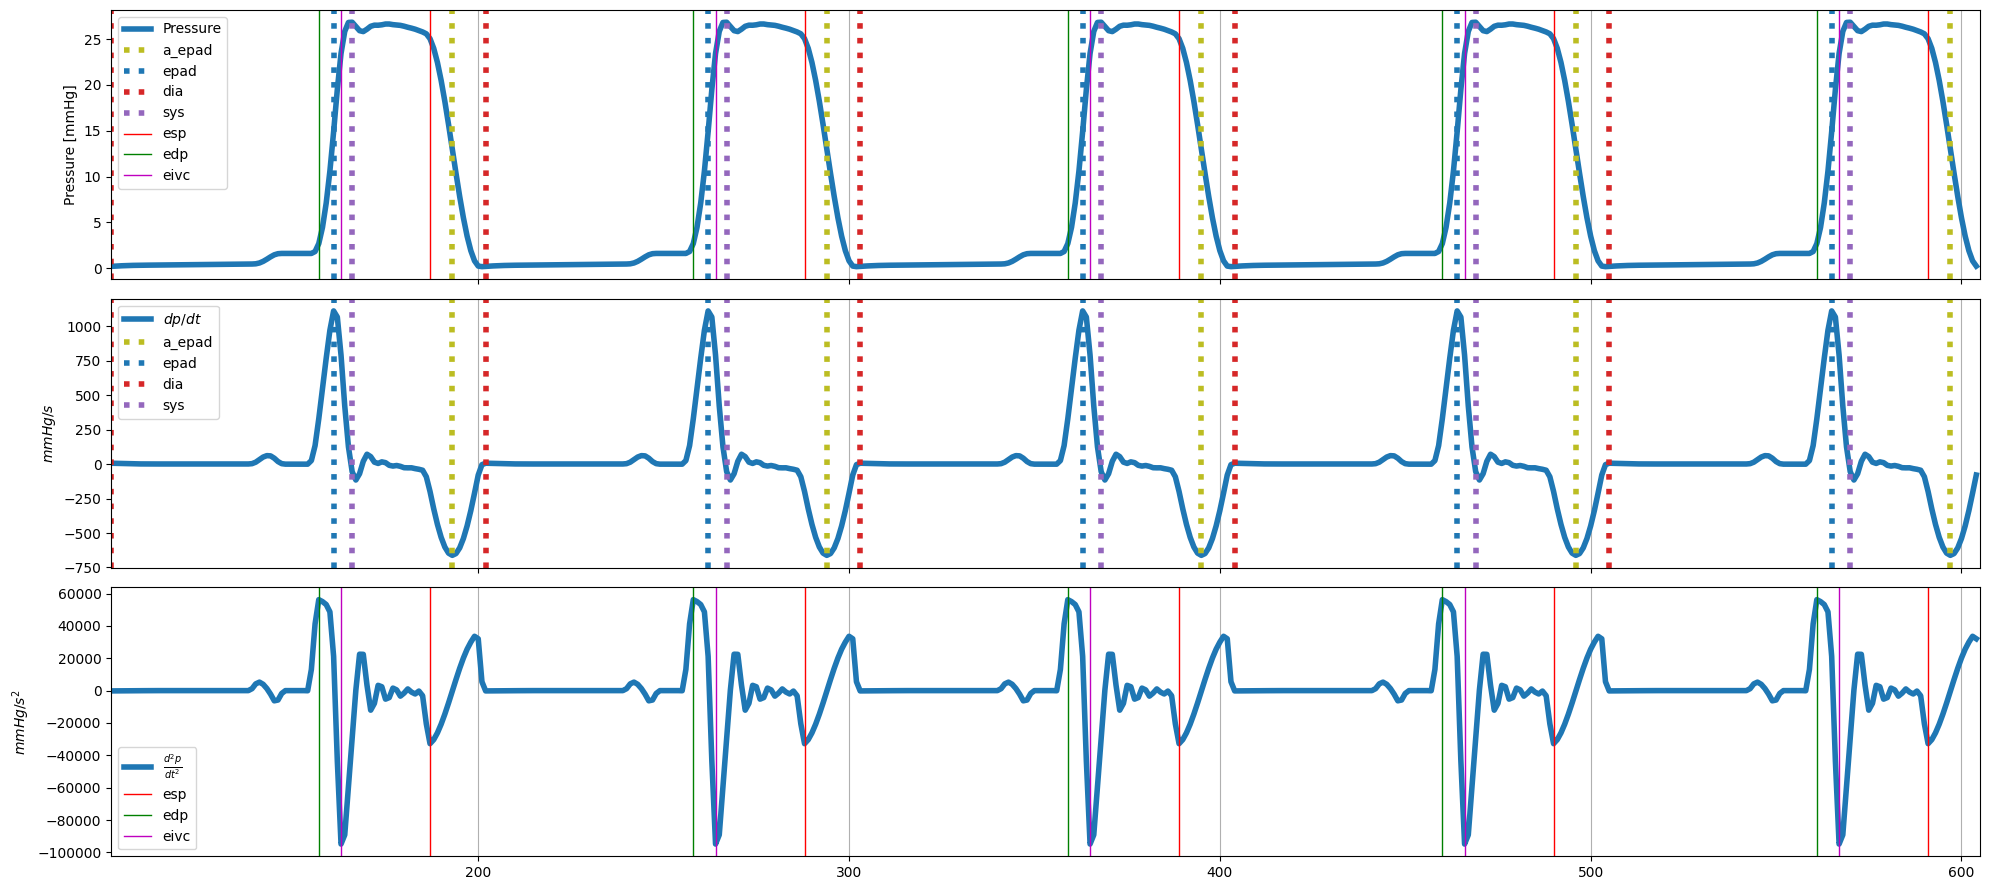

In [8]:
start = int(ag._points_df['dia_ind'].loc[0])
finish = len(ag._df) - 1
        
a_epad_ind = ag._points_df['a_epad_ind'].values.astype(int)
a_epad_ind = a_epad_ind[(a_epad_ind >= start) & (a_epad_ind < finish)]

epad_ind = ag._points_df['epad_ind'].values.astype(int)
epad_ind = epad_ind[(epad_ind >= start) & (epad_ind < finish)]

dia_ind = ag._points_df['dia_ind'].values.astype(int)
dia_ind = dia_ind[(dia_ind >= start) & (dia_ind < finish)]

sys_ind = ag._points_df['sys_ind'].values.astype(int)
sys_ind = sys_ind[(sys_ind >= start) & (sys_ind < finish)]

esp_ind = ag._points_df['esp_ind'].values.astype(int)
esp_ind = esp_ind[(esp_ind >= start) & (esp_ind < finish)]

edp_ind = ag._points_df['edp_ind'].values.astype(int)
edp_ind = edp_ind[(edp_ind >= start) & (edp_ind < finish)]

eivc_ind = ag._points_df['eivc_ind'].values.astype(int)
eivc_ind = eivc_ind[(eivc_ind >= start) & (eivc_ind < finish)]

fig, ax = plt.subplots(figsize=(20,9), nrows=3)
ax[0].grid(axis='x')
ax[0].plot(ag._df.index[start:finish], ag._df['fcPressure'].iloc[start:finish], label='Pressure', linewidth=4, linestyle='-')
ax[0].set_ylabel('Pressure [mmHg]')
ax[0].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[0].tick_params(axis='x',labelbottom=False)

flag0 = True
for a_epad, epad, dia, sys, esp, edp, eivc in zip(a_epad_ind, epad_ind, dia_ind, sys_ind, esp_ind, edp_ind, eivc_ind):
    ax[0].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag0 else None)
    ax[0].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag0 else None)
    ax[0].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag0 else None)
    ax[0].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],linewidth=4, linestyle=':', label='sys' if flag0 else None)
    ax[0].axvline(ag._df.index[esp],    color='r',                                 linewidth=1, linestyle='-', label='esp' if flag0 else None)
    ax[0].axvline(ag._df.index[edp],    color='g',                                 linewidth=1, linestyle='-', label='edp' if flag0 else None)
    ax[0].axvline(ag._df.index[eivc],   color='m',                                 linewidth=1, linestyle='-', label='eivc' if flag0 else None)
    flag0 = False
ax[0].legend()

ax[1].grid(axis='x')
ax[1].plot(ag._df.index[start:finish], ag._df['fdpdt'].iloc[start:finish] , label='${dp}/{dt}$', linewidth=4, linestyle='-')
ax[1].set_ylabel('$mmHg/s$')
ax[1].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[1].tick_params(axis='x',labelbottom=False)

flag1 = True
for a_epad, epad, dia, sys in zip(a_epad_ind, epad_ind, dia_ind, sys_ind):
    ax[1].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag1 else None)
    ax[1].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag1 else None)
    ax[1].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag1 else None)
    ax[1].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],  linewidth=4, linestyle=':', label='sys' if flag1 else None)
    flag1 = False
ax[1].legend()


ax[2].grid(axis='x')
ax[2].plot(ag._df.index[start:finish], ag._df['fd2pdt2'].iloc[start:finish] , label='$\\frac{d^2p}{dt^2}$', linewidth=4, linestyle='-')
ax[2].set_ylabel('$mmHg/s^2$')

flag2 = True
for sys, a_epad, esp, edp, eivc in zip(sys_ind, a_epad_ind, esp_ind, edp_ind, eivc_ind):
    ax[2].axvline(ag._df.index[esp],    color='r',                                   linewidth=1, linestyle='-', label='esp' if flag2 else None)
    ax[2].axvline(ag._df.index[edp],    color='g',                                   linewidth=1, linestyle='-', label='edp' if flag2 else None)
    ax[2].axvline(ag._df.index[eivc],   color='m',                                   linewidth=1, linestyle='-', label='eivc' if flag2 else None)
    flag2 = False
ax[2].set_xlim([ag._df.index[start], ag._df.index[finish]])
# ax[2].tick_params(axis='x', labelbottom=False)
ax[2].legend()

fig.tight_layout()

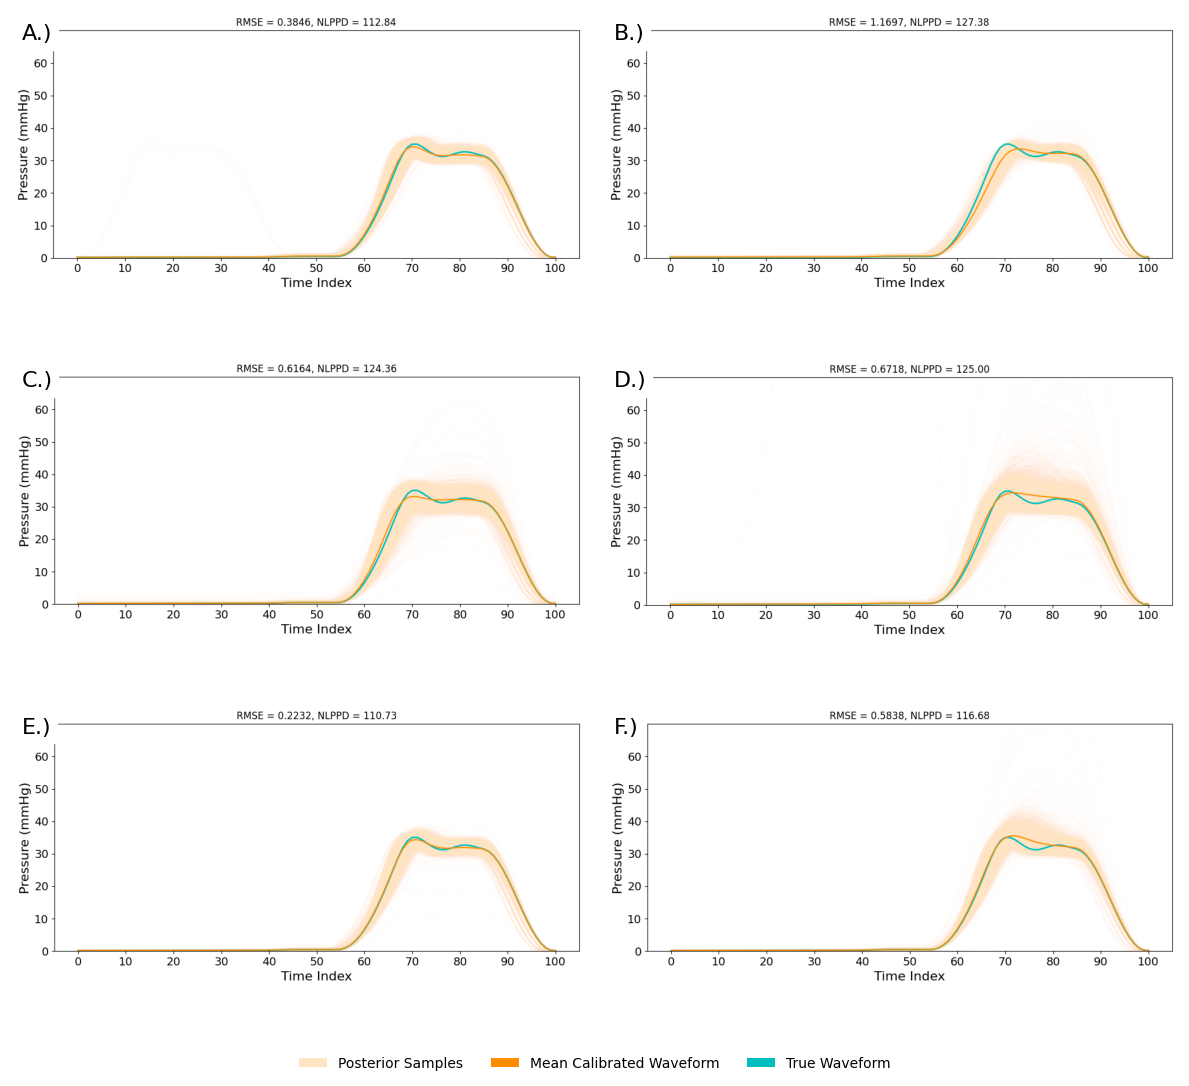

In [12]:
import os
import math
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Same image loading as before
dir = '/figures/posterior_simulated_waveforms.png'
image_paths = [
    f"../output_synthetic/output_4096_6_params/bayesian_calibration_results/11_output_keys/calibration_20250818_141427{dir}",   # CI 
    f"../output_synthetic/output_4096_7_params/bayesian_calibration_results/102_output_keys/calibration_20250826_141923{dir}",  # timeseries 
    f"../output_synthetic/output_4096_9_params/bayesian_calibration_results/4_output_keys/calibration_20250827_115518{dir}",  # PCA 1-3 
    f"../output_synthetic/output_4096_11_params/bayesian_calibration_results/11_output_keys/calibration_20250826_110720{dir}",  # PCA 1-10 
    f"../output_synthetic/output_4096_9_params/bayesian_calibration_results/14_output_keys/calibration_20250827_110736{dir}",   # CI + PCA 1-3 
    f"../output_synthetic/output_4096_11_params/bayesian_calibration_results/21_output_keys/calibration_20250826_152208{dir}",  # CI + PCA 1-10 
  

]

images = [Image.open(p) for p in image_paths]
labels = ['A.)', 'B.)', 'C.)', 'D.)', 'E.)', 'F.)']

# Layout calculation
n_images = len(images)
n_cols = 2
n_rows = math.ceil(n_images / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, (ax, img) in enumerate(zip(axes, images)):
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.02, 0.95, labels[i], transform=ax.transAxes, fontsize=16,
            va='top', ha='left', backgroundcolor='white')

# Remove unused axes
for j in range(n_images, len(axes)):
    fig.delaxes(axes[j])


legend_elements = [
    Patch(facecolor='bisque', linewidth=1, label="Posterior Samples"),
    Patch(facecolor='darkorange', linewidth=1, label="Mean Calibrated Waveform"),
    Patch(facecolor='c', label='True Waveform', linewidth=1)
]

fig.legend(handles=legend_elements,
           loc='lower center',
           bbox_to_anchor=(0.5, 0.05),  # Centered below the figure
           fontsize=10,
           frameon=False,
           ncol=3)

plt.tight_layout(rect=[0, 0.07, 1, 1])  # Make space at bottom for legend
plt.savefig("combined_figure_with_legend.png", dpi=700, bbox_inches='tight')
plt.show()

In [24]:
sensitivity_data = pd.read_csv('../output_synthetic/output_64_21_params_old/waveform_resampled_all_pressure_traces_rv.csv')
sensitivity_data.head()

,0,1,2,3,4,5,6,7,8,9,...,Ees/Ea,iT,iHR,edp,eivc,MC_EF,MC_edp,MC_eivc,MC_dia,t_pulse
0,0.653365,0.764508,0.839922,0.877566,0.890945,0.900728,0.910410,0.920138,0.929913,0.939734,...,0.560464,0.890833,67.352708,5.090759,27.470215,0.476578,4.550442,23.022157,0.008908,0.391966
1,0.396025,0.396025,0.396025,0.396025,0.396025,0.396025,0.396025,0.396025,0.396025,0.396025,...,0.437979,0.587098,102.197540,1.161172,40.793829,0.313598,0.949839,35.212095,0.005871,0.264194
2,0.264396,0.314038,0.360183,0.402308,0.439961,0.472788,0.500577,0.523309,0.541227,0.554928,...,0.904447,0.760396,78.906232,2.090182,22.092237,0.583454,1.721484,18.707369,0.007604,0.334574
3,0.332255,0.332255,0.332255,0.332255,0.332255,0.332255,0.332255,0.332255,0.332255,0.332255,...,0.408681,0.509695,117.717522,0.927292,49.596329,0.208476,0.657795,54.649268,0.005097,0.229363
4,1.603937,1.603937,1.603937,1.603937,1.603937,1.603937,1.603937,1.603937,1.603937,1.603937,...,0.308436,0.948226,63.276073,4.123248,40.720196,0.230263,3.917225,37.434073,0.009482,0.426702


In [ ]:
# take means of column dia_ind
sensitivity_data[['dia_ind', 'sys_ind', 'edp_ind', 'esp_ind', 'eivc_ind', 'a_epad_ind', 'epad_ind']].mean()

dia_ind       246.359375
sys_ind       319.796875
edp_ind       301.000000
esp_ind       330.375000
eivc_ind      311.578125
a_epad_ind    337.000000
epad_ind      309.734375
dtype: float64

### KF versus B2B calibration plots

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_b2b_vs_kf(b2b_filepath, kf_filepath, true_params=None):
    """
    Plot Bayesian calibration vs Kalman filter estimates for parameters.

    Parameters
    ----------
    b2b_filepath : str
        Path to Bayesian calibration results folder (should contain posterior_mean.csv and posterior_covariances.npy).
    kf_filepath : str
        Path to Kalman filter results folder (should contain kf_estimated_means.csv and kf_estimated_covariances.npy).
    true_params : dict, optional
        Dictionary of true parameter values with keys as parameter names.
        Example: {"pat.r": {"start": 0.3, "step": 0.1}}
    """
    true_params = true_params or {}

    # --- Load Bayesian calibration results ---
    b2b_patr_mean = pd.read_csv(os.path.join(b2b_filepath, "posterior_mean.csv"))
    b2b_sigma_estimates = np.load(os.path.join(b2b_filepath, "posterior_covariances.npy"))  # FIX: use np.load
    b2b_var = np.array([np.diag(Sigma_t) for Sigma_t in b2b_sigma_estimates])
    b2b_ci95 = 1.96 * np.sqrt(b2b_var)

    # --- Load Kalman filter results ---
    kf_patr_mean = pd.read_csv(os.path.join(kf_filepath, "kf_estimated_means.csv"))
    kf_sigma_estimates = np.load(os.path.join(kf_filepath, "kf_estimated_covariances.npy"))
    kf_var = np.array([np.diag(Sigma_t) for Sigma_t in kf_sigma_estimates])
    kf_ci95 = 1.96 * np.sqrt(kf_var)

    # --- Compute dimensions ---
    n_params = b2b_patr_mean.shape[1]
    n_times_b2b = b2b_patr_mean.shape[0]
    n_times_kf = kf_patr_mean.shape[0]

    # --- Time vectors ---
    time_b2b = np.arange(n_times_b2b)
    time_kf = np.arange(n_times_kf)

    # --- Parameter columns (exclude 'T' if present) ---
    param_cols = [col for col in b2b_patr_mean.columns if col != 'T']

    # --- Setup figure ---
    fig, axes = plt.subplots(len(param_cols), 1, figsize=(10, 3 * len(param_cols)), sharex=True)
    if len(param_cols) == 1:
        axes = [axes]

    handles, labels = [], []

    for idx, col in enumerate(param_cols):
        ax = axes[idx]

        # --- True parameter (if provided) ---
        if col in true_params:
            start = true_params[col]["start"]
            step = true_params[col]["step"]
            true_values = start + step * (time_b2b // 20)
            h_true, = ax.plot(time_b2b, true_values, 'g-', linewidth=2)

        # --- Bayesian calibration ---
        mean_b2b = b2b_patr_mean[col].values
        ci_b2b = b2b_ci95[:, idx]  # FIX: use time-varying CI
        h_b2b, = ax.plot(time_b2b, mean_b2b, 'b--', label="B2B mean")
        ax.fill_between(time_b2b, mean_b2b - ci_b2b, mean_b2b + ci_b2b, color='blue', alpha=0.2)

        # --- Kalman filter ---
        mean_kf = kf_patr_mean[col].values
        ci_kf = kf_ci95[:, idx]  # FIX: use time-varying CI
        h_kf, = ax.plot(time_kf, mean_kf, 'r--', label="KF mean")
        ax.fill_between(time_kf, mean_kf - ci_kf, mean_kf + ci_kf, color='red', alpha=0.1)

        # --- Labels and style ---
        ax.set_title(f"Parameter: {col}")
        ax.set_ylabel("Estimate")
        ax.grid(True)

        # Collect handles for legend
        if idx == 0:
            handles = [h_b2b, h_kf]
            labels = ['B2B mean', 'KF mean']
            if col in true_params:
                handles.insert(0, h_true)
                labels.insert(0, 'True value')

    axes[-1].set_xlabel("Beat")

    # --- Add a single legend at the bottom ---
    fig.legend(handles, labels, loc='lower center', ncol=len(handles), frameon=False, fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_b2b_vs_kf_new(b2b_filepath, kf_filepath, true_params_csv=None):
    """
    Plot Bayesian calibration vs Kalman filter estimates for parameters.

    Parameters
    ----------
    b2b_filepath : str
        Path to Bayesian calibration results folder (should contain posterior_mean.csv and posterior_covariances.npy).
    kf_filepath : str
        Path to Kalman filter results folder (should contain kf_estimated_means.csv and kf_estimated_covariances.npy).
    true_params_csv : str, optional
        Path to CSV file containing true parameter values (columns = parameter names, last column 'T' ignored).
    """
    # --- Load Bayesian calibration results ---
    b2b_patr_mean = pd.read_csv(os.path.join(b2b_filepath, "posterior_mean.csv"))
    b2b_sigma_estimates = np.load(os.path.join(b2b_filepath, "posterior_covariances.npy"))
    b2b_var = np.array([np.diag(Sigma_t) for Sigma_t in b2b_sigma_estimates])
    b2b_ci95 = 1.96 * np.sqrt(b2b_var)

    # --- Load Kalman filter results ---
    kf_patr_mean = pd.read_csv(os.path.join(kf_filepath, "kf_estimated_means.csv"))
    kf_sigma_estimates = np.load(os.path.join(kf_filepath, "kf_estimated_covariances.npy"))
    kf_var = np.array([np.diag(Sigma_t) for Sigma_t in kf_sigma_estimates])
    kf_ci95 = 1.96 * np.sqrt(kf_var)

    # --- Load true parameters if CSV is provided ---
    true_params = None
    if true_params_csv is not None:
        true_df = pd.read_csv(true_params_csv)
        # Remove 'T' column if present
        if 'T' in true_df.columns:
            true_df = true_df.drop(columns=['T'])
        true_params = true_df

    # --- Compute dimensions ---
    n_params = b2b_patr_mean.shape[1]
    n_times_b2b = b2b_patr_mean.shape[0]
    n_times_kf = kf_patr_mean.shape[0]

    # --- Time vectors ---
    time_b2b = np.arange(n_times_b2b)
    time_kf = np.arange(n_times_kf)

    # --- Parameter columns (exclude 'T') ---
    param_cols = [col for col in b2b_patr_mean.columns if col != 'T']

    # --- Setup figure ---
    fig, axes = plt.subplots(len(param_cols), 1, figsize=(10, 3 * len(param_cols)), sharex=True)
    if len(param_cols) == 1:
        axes = [axes]

    handles, labels = [], []

    for idx, col in enumerate(param_cols):
        ax = axes[idx]

        # --- True parameter (if provided) ---
        if true_params is not None and col in true_params.columns:
            true_values = true_params[col].values
            h_true, = ax.plot(time_b2b, true_values, 'g-', linewidth=2)

        # --- Bayesian calibration ---
        mean_b2b = b2b_patr_mean[col].values
        ci_b2b = b2b_ci95[:, idx]
        h_b2b, = ax.plot(time_b2b, mean_b2b, 'b--', label="B2B mean")
        ax.fill_between(time_b2b, mean_b2b - ci_b2b, mean_b2b + ci_b2b, color='blue', alpha=0.2)

        # --- Kalman filter ---
        mean_kf = kf_patr_mean[col].values
        ci_kf = kf_ci95[:, idx]
        h_kf, = ax.plot(time_kf, mean_kf, 'r--', label="KF mean")
        ax.fill_between(time_kf, mean_kf - ci_kf, mean_kf + ci_kf, color='red', alpha=0.1)

        # --- Labels and style ---
        ax.set_title(f"Parameter: {col}")
        ax.set_ylabel("Estimate")
        ax.grid(True)

        # Collect handles for legend
        if idx == 0:
            handles = [h_b2b, h_kf]
            labels = ['B2B mean', 'KF mean']
            if true_params is not None and col in true_params.columns:
                handles.insert(0, h_true)
                labels.insert(0, 'True value')

    axes[-1].set_xlabel("Beat")

    # --- Add a single legend at the bottom ---
    fig.legend(handles, labels, loc='lower center', ncol=len(handles), frameon=False, fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

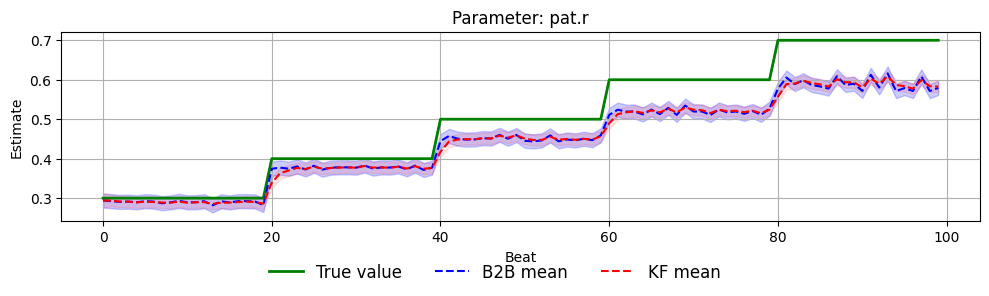

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

b2b_filepath = "../CohortDataRaw2/output_real/pat_synthetic_2_R/bayesian_calibration_results/14_output_keys/calibration_20251023_140303/"
kf_filepath  = "../CohortDataRaw2/output_real/pat_synthetic_2_R/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251023_140303/"


# True parameter values
true_params = {
    "pat.r": {"start": 0.3, "step": 0.1},
    #"pat.c": {"start": 3.8, "step": -0.1}
}

plot_b2b_vs_kf(b2b_filepath, kf_filepath, true_params=true_params)

### check results are the same if calibrated with emulator trained on 100 samples not 1024

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

b2b_filepath = "../CohortDataRaw2/output_real/pat_synthetic_2_R/bayesian_calibration_results/14_output_keys/calibration_20251022_151615/"
kf_filepath  = "../CohortDataRaw2/output_real/pat_synthetic_2_R/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251022_151615/"

# True parameter values
true_params = {
    "pat.r": {"start": 0.3, "step": 0.1},
    #"pat.c": {"start": 3.8, "step": -0.1}
}

plot_b2b_vs_kf(b2b_filepath, kf_filepath, true_params=true_params)

FileNotFoundError: [Errno 2] No such file or directory: '../CohortDataRaw2/output_real/pat_synthetic_2_R/bayesian_calibration_results/14_output_keys/calibration_20251022_151615//posterior_covariances.npy'

### Calibrated using an emulator trained on 100 samples

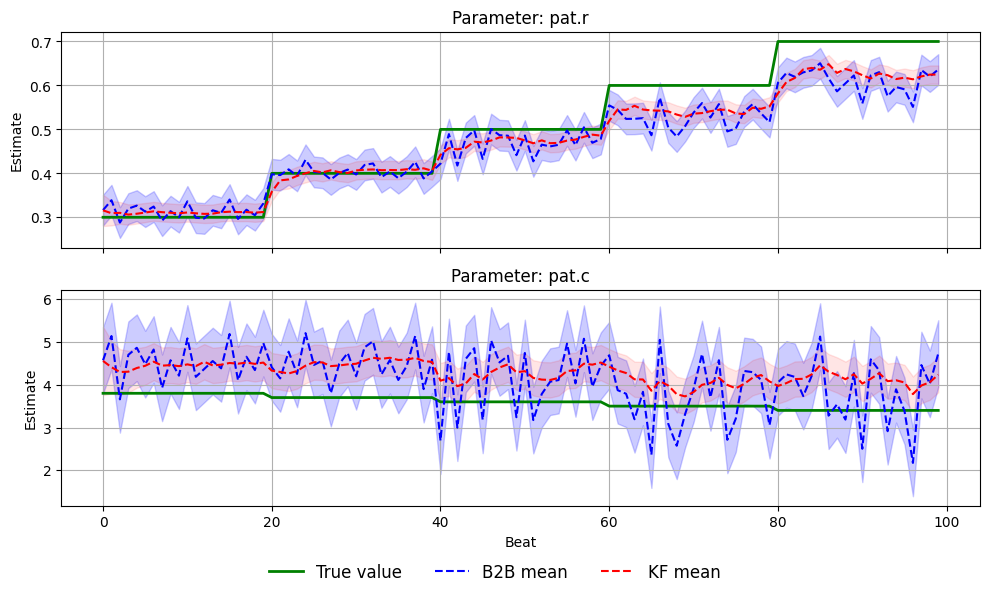

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

b2b_filepath = "../CohortDataRaw2/output_real/pat_synthetic_3_RC/bayesian_calibration_results/14_output_keys/calibration_20251023_135038/"
kf_filepath  = "../CohortDataRaw2/output_real/pat_synthetic_3_RC/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251023_135038/"


# True parameter values
true_params = {
    "pat.r": {"start": 0.3, "step": 0.1},
    "pat.c": {"start": 3.8, "step": -0.1}
}

plot_b2b_vs_kf(b2b_filepath, kf_filepath, true_params=true_params)

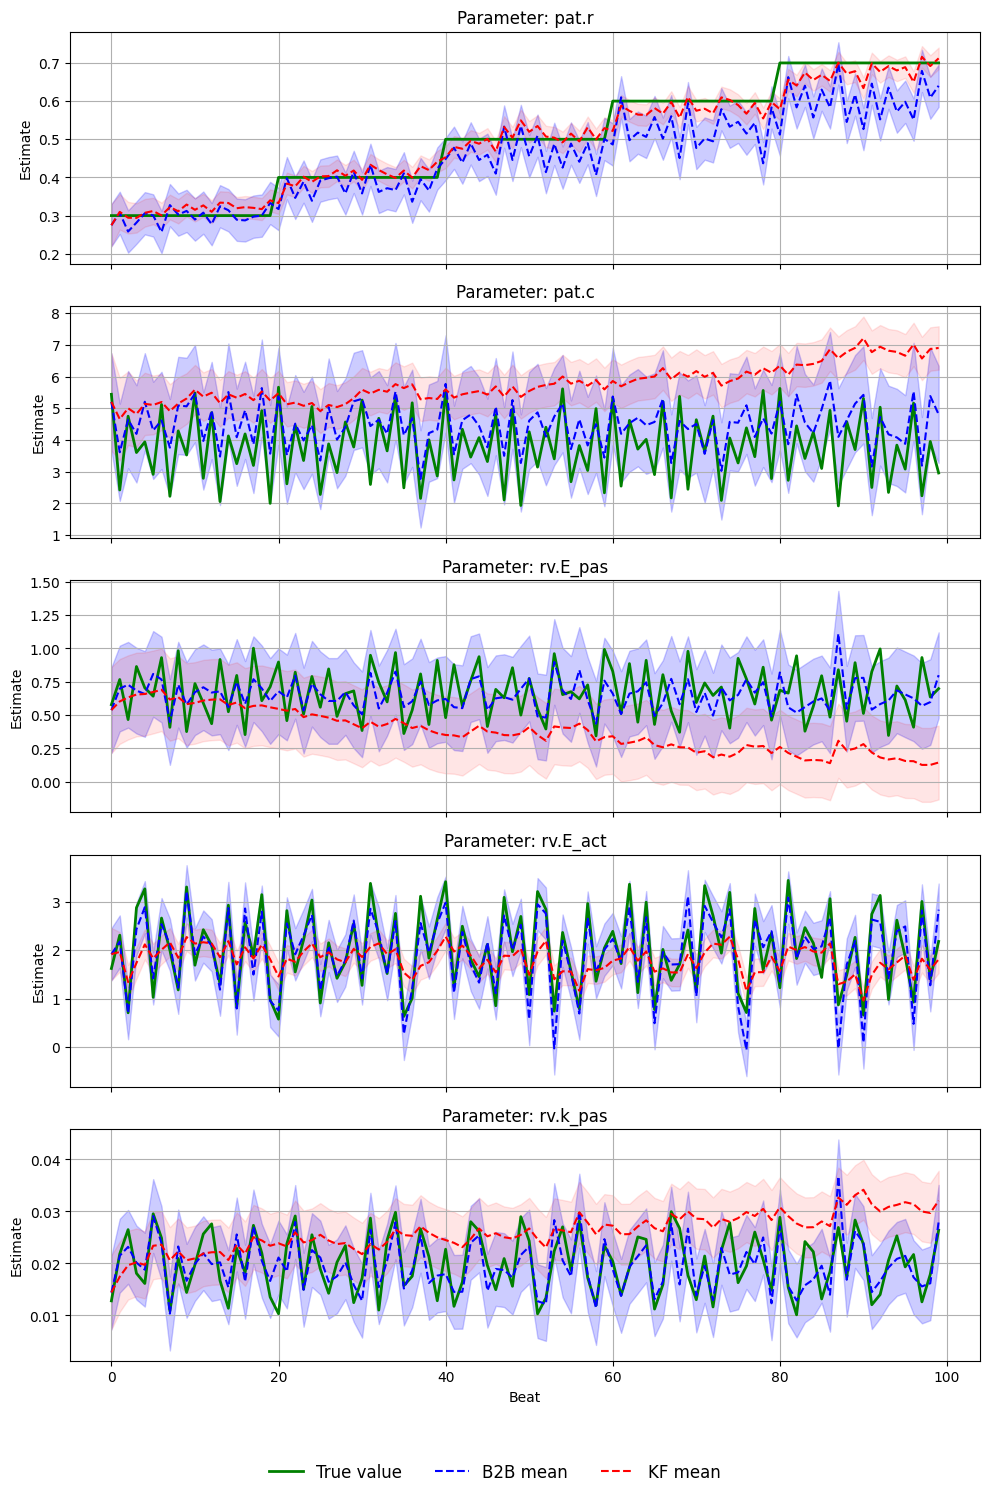

In [78]:

b2b_filepath = "../CohortDataRaw2/output_real/pat_synthetic_6/bayesian_calibration_results/14_output_keys/calibration_20251023_142651"
kf_filepath  = "../CohortDataRaw2/output_real/pat_synthetic_6/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251023_142651/"


# True parameter values
true_params = "../CohortDataRaw2/output_real/pat_synthetic_6/pure_input_100_6_params.csv"

plot_b2b_vs_kf_new(b2b_filepath, kf_filepath, true_params_csv=true_params)

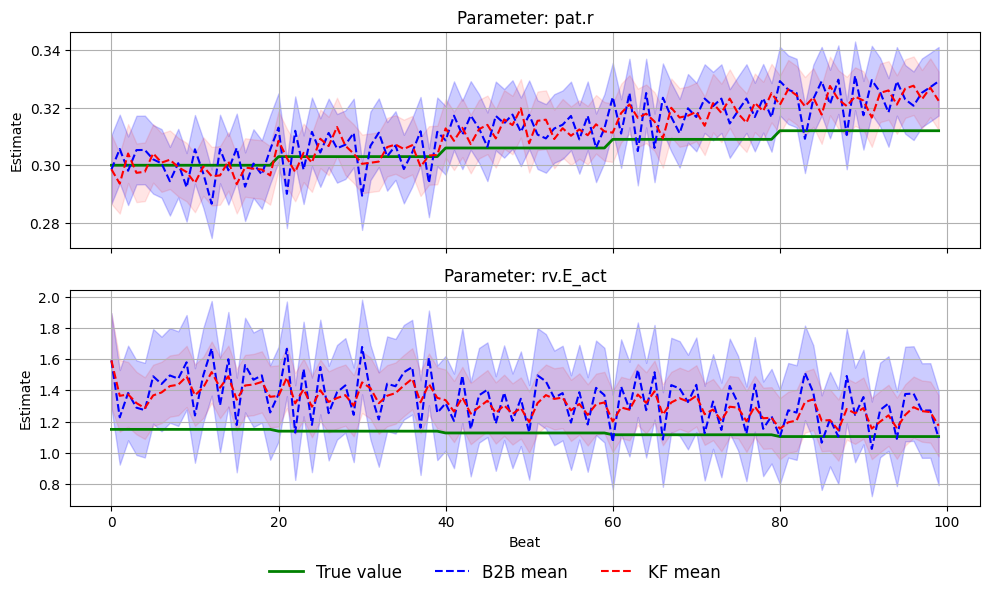

In [83]:

b2b_filepath = "../CohortDataRaw2/output_real/pat_synthetic_3/bayesian_calibration_results/14_output_keys/calibration_20251023_170148"
kf_filepath  = "../CohortDataRaw2/output_real/pat_synthetic_3/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251023_170148/"


# True parameter values
true_params = "../CohortDataRaw2/output_real/pat_synthetic_3/pure_input_100_3_params.csv"

plot_b2b_vs_kf_new(b2b_filepath, kf_filepath, true_params_csv=true_params)